## 1. Project Overview
In this notebook, we will build a 2-layer Neural Network without using deep learning frameworks like TensorFlow or PyTorch. We will rely solely on **NumPy** for matrix mathematics.

### The Problem: XOR Gate
We will train the network to solve the **XOR (Exclusive OR)** problem. This is a classic benchmark because the data is **not linearly separable**. A straight line cannot separate the 0s from the 1s; the network must learn a curved decision boundary.

**Truth Table:**
| Input A | Input B | Output (A ^ B) |
| :---: | :---: | :---: |
| 0 | 0 | **0** |
| 0 | 1 | **1** |
| 1 | 0 | **1** |
| 1 | 1 | **0** |

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

plt.style.use('ggplot')
np.random.seed(10)

## 2. Mathematical Foundation

### A. Architecture
*   **Input Layer:** 2 Neurons (representing Input A and Input B).
*   **Hidden Layer:** 2 Neurons (sufficient to learn the XOR pattern).
*   **Output Layer:** 1 Neuron (probability of the output being 1).

### B. Forward Propagation
The flow of data from input to output. For a given layer with weights $W$, bias $b$, and input $X$

### C. Backpropagation (Learning)
We use the **Chain Rule** to calculate gradients.

In [3]:
class NeuralNetwork:
    def __init__(self,input_size,hidden_size,output_size,learning_rate=0.1):
        # Initializing sizes
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lr = learning_rate

        # Weight Initialization
        self.W1 = np.random.uniform(size = (self.input_size,self.hidden_size))
        self.b1 = np.random.uniform(size = (1,self.hidden_size))
        
        self.W2 = np.random.uniform(size = (self.hidden_size,self.output_size))
        self.b2 = np.random.uniform(size = (1,self.output_size))

        self.loss_history = []

    # Activation Function
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    
    def sigmoid_derivative(self,x):
        return x*(1-x)
    
    # Forward Pass
    def forward(self,X):

        self.z1 = np.dot(X, self.W1)+self.b1
        self.a1 = self.sigmoid(self.z1)

        self.z2 = np.dot(self.a1,self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2
    
    # Backward Pass
    def backward(self,X,y,output):
        error = y - output
        d_output = error * self.sigmoid_derivative(output)

        error_hidden = d_output.dot(self.W2.T)
        d_hidden = error_hidden * self.sigmoid_derivative(self.a1)

        self.W2 += self.a1.T.dot(d_output)*self.lr
        self.b2 += np.sum(d_output,axis=0,keepdims=True) *self.lr

        self.W1 += X.T.dot(d_hidden)*self.lr
        self.b1 += np.sum(d_hidden,axis=0,keepdims=True) *self.lr

        return np.mean(np.square(error))
    
    def train(self,X ,y , epochs=10000):
        for epoch in range(epochs):
            output = self.forward(X)
            loss = self.backward(X,y,output)
            self.loss_history.append(loss)

            if epoch%1000 == 0:
                print(f"Epoch: {epoch} | Loss: {loss:.5f}")
    
    def predict(self,X):
         return np.round(self.forward(X))

In [4]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

nn = NeuralNetwork(input_size=2,hidden_size=4,output_size=1,learning_rate=0.5)

print(" Training Starting")
nn.train(X,y,epochs = 10000)
print(" Training Completed")

 Training Starting
Epoch: 0 | Loss: 0.40310
Epoch: 1000 | Loss: 0.02549
Epoch: 2000 | Loss: 0.00285
Epoch: 3000 | Loss: 0.00136
Epoch: 4000 | Loss: 0.00087
Epoch: 5000 | Loss: 0.00063
Epoch: 6000 | Loss: 0.00050
Epoch: 7000 | Loss: 0.00041
Epoch: 8000 | Loss: 0.00034
Epoch: 9000 | Loss: 0.00030
 Training Completed


In [6]:
print("Final Prediction")

for i in range(len(X)):
    print(f"Input: {X[i]} | Target: y{[i]} | Predicted: {nn.forward(X[i:i+1])[0][0]:.4f}")

Final Prediction
Input: [0 0] | Target: y[0] | Predicted: 0.0178
Input: [0 1] | Target: y[1] | Predicted: 0.9852
Input: [1 0] | Target: y[2] | Predicted: 0.9838
Input: [1 1] | Target: y[3] | Predicted: 0.0155


## 3. Visualization

Here we will visualize two things:
1.  **Loss Curve:** To ensure the network actually learned and the error decreased over time.
2.  **Decision Boundary:** To visualize the "shape" of the solution. Since we are using a hidden layer, we expect a non-linear (curved) boundary that separates the (0,0) and (1,1) form the (0,1) and (1,0).

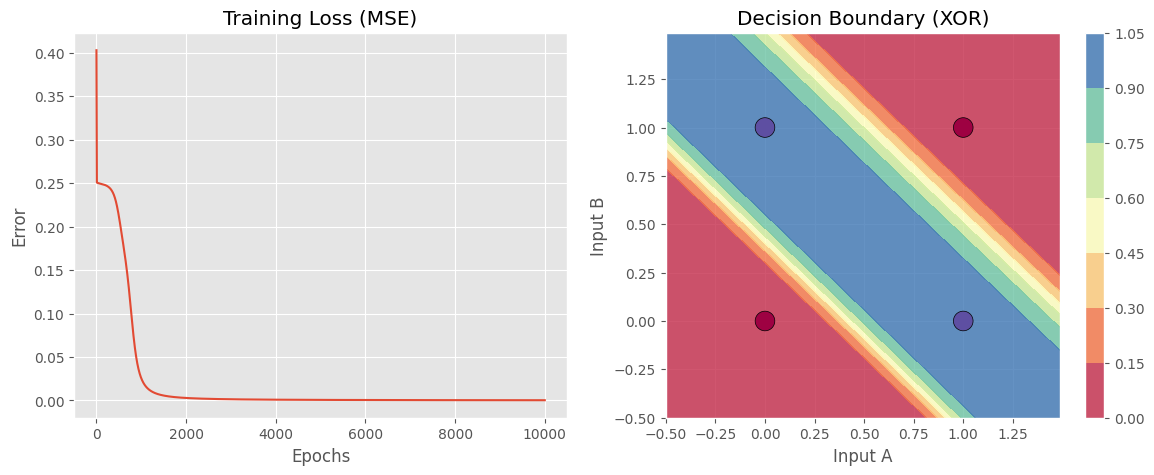

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Loss History
ax1.plot(nn.loss_history)
ax1.set_title("Training Loss (MSE)")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Error")
ax1.grid(True)

# Plot 2: Decision Boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = nn.forward(grid_points)
Z = Z.reshape(xx.shape)

# Plot contours
contour = ax2.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
ax2.scatter(X[:, 0], X[:, 1], c=y.flatten(), s=200, cmap=plt.cm.Spectral, edgecolors='k')
ax2.set_title("Decision Boundary (XOR)")
ax2.set_xlabel("Input A")
ax2.set_ylabel("Input B")
plt.colorbar(contour, ax=ax2)

plt.show()

# The same Structure using PyTorch

In [8]:
import torch 
import torch.nn as nn
import torch.optim as optim

In [9]:
X_numpy = np.array([[0,0], [0,1], [1,0], [1,1]])
y_numpy = np.array([[0], [1], [1], [0]])

X = torch.tensor(X_numpy, dtype=torch.float32)
y = torch.tensor(y_numpy, dtype=torch.float32)

print("Input Shape:", X.shape)
print("Target Shape:", y.shape)

Input Shape: torch.Size([4, 2])
Target Shape: torch.Size([4, 1])


In [13]:
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel,self).__init__()

        self.layer1 = nn.Linear(2,4)

        self.layer2 = nn.Linear(4,1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self,x):
        x = self.layer1(x)
        x = self.sigmoid(x)

        x = self.layer2(x)
        x = self.sigmoid(x)
        return x
    
model = XORModel()
print(model)

XORModel(
  (layer1): Linear(in_features=2, out_features=4, bias=True)
  (layer2): Linear(in_features=4, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [14]:
learning_rate = 0.1
epochs = 10000

criterion = nn.BCELoss() 
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_history = []

print("Training Starting")

for epoch in range(epochs):
    # 1. Forward Pass
    predictions = model(X)
    
    # 2. Calculate Loss
    loss = criterion(predictions, y)
    
    # 3. Backward Pass 
    optimizer.zero_grad() 
    loss.backward()      
    optimizer.step()      
    
    # Store loss
    loss_history.append(loss.item())
    
    if epoch % 1000 == 0:
        print(f"Epoch {epoch} | Loss: {loss.item():.5f}")

print("Training Completed")

Training Starting
Epoch 0 | Loss: 0.70829
Epoch 1000 | Loss: 0.69082
Epoch 2000 | Loss: 0.66634
Epoch 3000 | Loss: 0.54938
Epoch 4000 | Loss: 0.35745
Epoch 5000 | Loss: 0.15261
Epoch 6000 | Loss: 0.06869
Epoch 7000 | Loss: 0.03904
Epoch 8000 | Loss: 0.02587
Epoch 9000 | Loss: 0.01881
Training Completed


In [15]:
with torch.no_grad():
    final_preds = model(X).detach().numpy()
    rounded_preds = np.round(final_preds)

print("\nFinal Predictions:")
print(rounded_preds)


Final Predictions:
[[0.]
 [1.]
 [1.]
 [0.]]


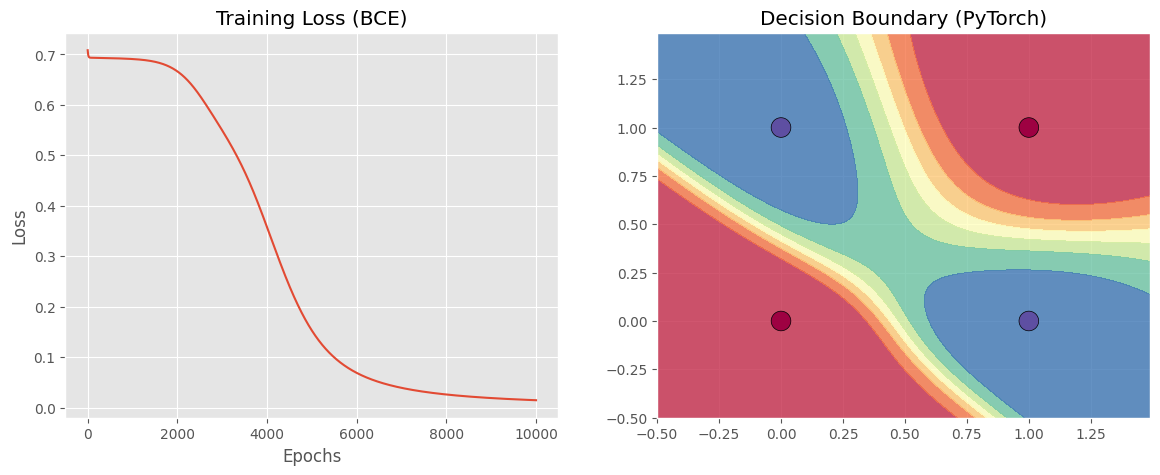

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot Loss
ax1.plot(loss_history)
ax1.set_title("Training Loss (BCE)")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")

# Plot Decision Boundary
x_min, x_max = X_numpy[:, 0].min() - 0.5, X_numpy[:, 0].max() + 0.5
y_min, y_max = X_numpy[:, 1].min() - 0.5, X_numpy[:, 1].max() + 0.5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

grid_tensor = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

with torch.no_grad():
    Z = model(grid_tensor).detach().numpy()
    Z = Z.reshape(xx.shape)

contour = ax2.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
ax2.scatter(X_numpy[:, 0], X_numpy[:, 1], c=y_numpy.flatten(), s=200, cmap=plt.cm.Spectral, edgecolors='k')
ax2.set_title("Decision Boundary (PyTorch)")

plt.show()

## Summary: NumPy vs PyTorch

| Feature | NumPy Implementation | PyTorch Implementation |
| :--- | :--- | :--- |
| **Layers** | Defined manually (`W1`, `b1` matrices) | `nn.Linear(2, 4)` |
| **Forward** | `dot(X, W) + b` | `layer(x)` |
| **Backward** | Manual Chain Rule (`d_output * sigmoid_deriv`) | `loss.backward()` |
| **Updates** | `W -= grad * lr` | `optimizer.step()` |

PyTorch abstracts the heavy calculus, allowing you to focus on the **Architecture** rather than the **Arithmetic**.